
2b. Refolded folds
===================
This example recreates the model from Laurent et al., 2016 and applied the fold geostatistics tools introduced by Grose et al., 2017.




In [1]:
from LoopStructural import GeologicalModel
from LoopStructural.visualisation import LavaVuModelViewer, RotationAnglePlotter
from LoopStructural.datasets import load_laurent2016
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import logging
# logging.getLogger().setLevel(logging.INFO)

# load in the data from the provided examples
data, bb = load_laurent2016()
# bb[1,2] = 10000

data.head()

newdata = pd.DataFrame([[5923.504395,4748.135254,3588.621094,'s2',1.0]],columns=['X','Y','Z','feature_name','val'])
data = pd.concat([data,newdata],sort=False)
data.loc[np.logical_and(data['feature_name'] == 's2',np.isnan(data['nx'])),'feature_name'] ='s21'
data.loc[np.logical_and(data['feature_name'] == 's0',~np.isnan(data['val'])),'feature_name'] = 's01'

# data.loc[np.logical_and(data['feature_name'] == 's1',~np.isnan(data['val'])),'feature_name'] = 's11'

rotation = [-69.11979675292969, 15.704944610595703, 6.00014591217041]

In [2]:
images = []

In [3]:
from LoopStructural.visualisation.model_visualisation import LavaVuModelViewer

Modelling S2
~~~~~~~~~~~~




2021-03-30 02:41:09,028 ~ LoopStructural.modelling.features.structural_frame_builder ~ WARNING    ~ Not enough constraints for structural frame coordinate 1, 
Add some more and try again.
2021-03-30 02:41:09,028 ~ LoopStructural.modelling.features.structural_frame_builder ~ WARNING    ~ Not enough constraints for structural frame coordinate 1, 
Add some more and try again.
2021-03-30 02:41:09,029 ~ LoopStructural.modelling.features.structural_frame_builder ~ WARNING    ~ Not enough constraints for fold frame coordinate 1, 
Add some more and try again.
2021-03-30 02:41:09,029 ~ LoopStructural.modelling.features.structural_frame_builder ~ WARNING    ~ Not enough constraints for fold frame coordinate 1, 
Add some more and try again.


(9, 7)



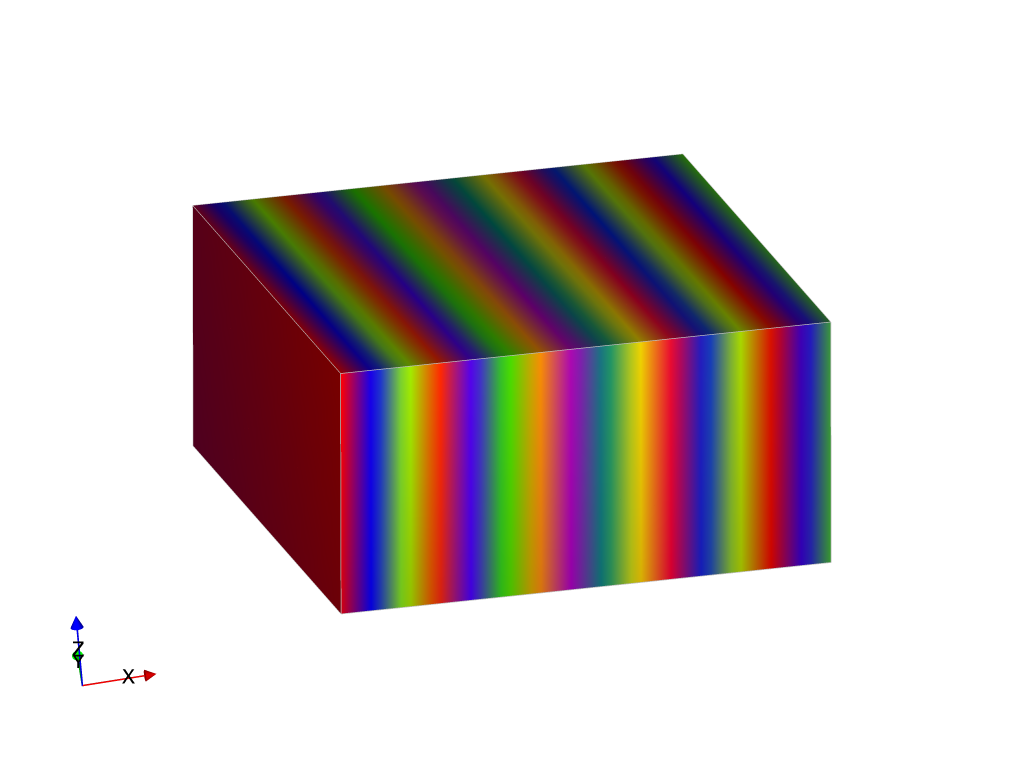

In [4]:
model = GeologicalModel(bb[0,:],bb[1,:])
model.set_model_data(data)
s2 = model.create_and_add_fold_frame('s2',
                                     nelements=1e5, 
                                     buffer=0.5,
                                    solver='lu',
                                    damp=True)
viewer = LavaVuModelViewer(model)
viewer.add_scalar_field(s2[0],
                       cmap='prism')
viewer.add_isosurface(s2[0],
                     slices=[0,1])
viewer.add_data(s2[0])
viewer.rotate(rotation)
viewer.display()
images.append(viewer.image_array())

In [5]:
# viewer = LavaVuModelViewer(model)
# # viewer.add_scalar_field(s2[0],
# #                        cmap='prism')
# viewer.add_isosurface(s2[0],
#                      nslices=10)
# viewer.add_data(s2[0])
# viewer.rotate(rotation)
# viewer.interactive()

Modelling S1
~~~~~~~~~~~~




In [6]:
s1 = model.create_and_add_folded_fold_frame('s1',
                                            limb_wl=8, 
                                            av_fold_axis=True,
                                            nelements=5e4,
                                            buffer=0.3,
                                            solver='lu'
                                           )





2021-03-30 02:42:02,878 ~ LoopStructural.modelling.features.structural_frame_builder ~ WARNING    ~ Not enough constraints for structural frame coordinate 1, 
Add some more and try again.
2021-03-30 02:42:02,878 ~ LoopStructural.modelling.features.structural_frame_builder ~ WARNING    ~ Not enough constraints for structural frame coordinate 1, 
Add some more and try again.
2021-03-30 02:42:02,889 ~ LoopStructural.modelling.features.structural_frame_builder ~ WARNING    ~ Not enough constraints for fold frame coordinate 1, 
Add some more and try again.
2021-03-30 02:42:02,889 ~ LoopStructural.modelling.features.structural_frame_builder ~ WARNING    ~ Not enough constraints for fold frame coordinate 1, 
Add some more and try again.


(104, 7)



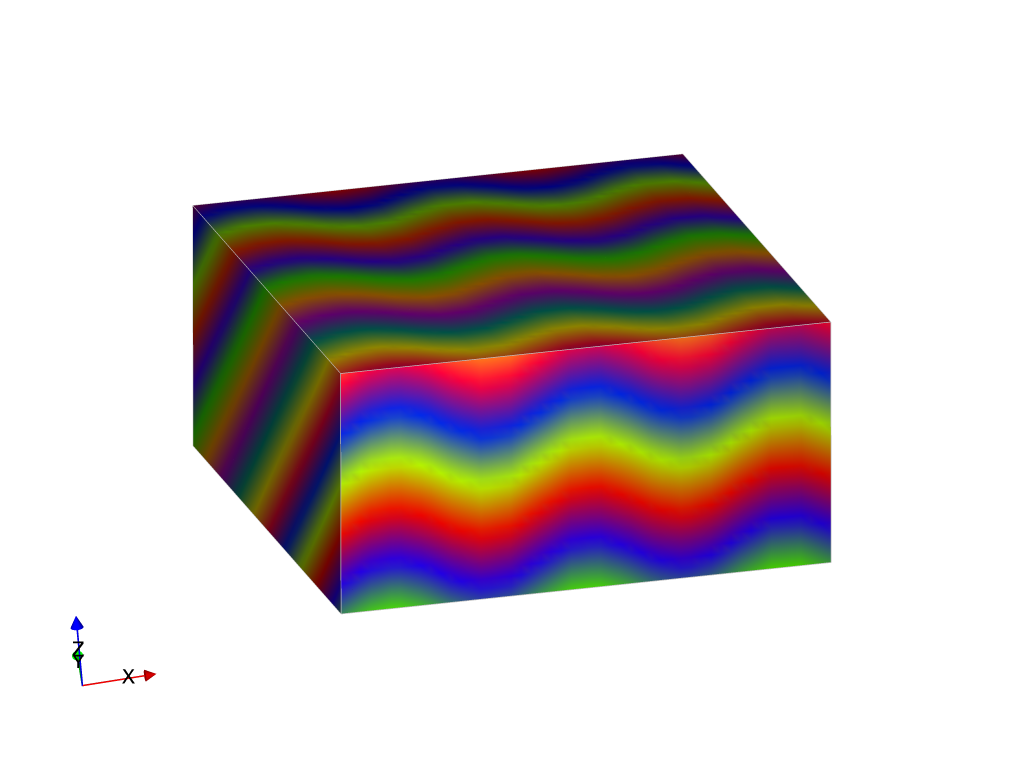

In [7]:
viewer = LavaVuModelViewer(model)
viewer.add_scalar_field(s1[0],
                       cmap='prism')
viewer.add_isosurface(s1[0],nslices=5)
# viewer.add_fold(s1.fold)
viewer.add_data(s1[0])
# viewer.add_points(s1[0].interpolator.support.nodes,'nodes')
viewer.rotate([-69.11979675292969, 15.704944610595703, 6.00014591217041])
viewer.display()
images.append(viewer.image_array())

S2/S1 S-Plots 
~~~~~~~~~~~~~




AttributeError: 'FoldRotationAngle' object has no attribute 'find_hinges'

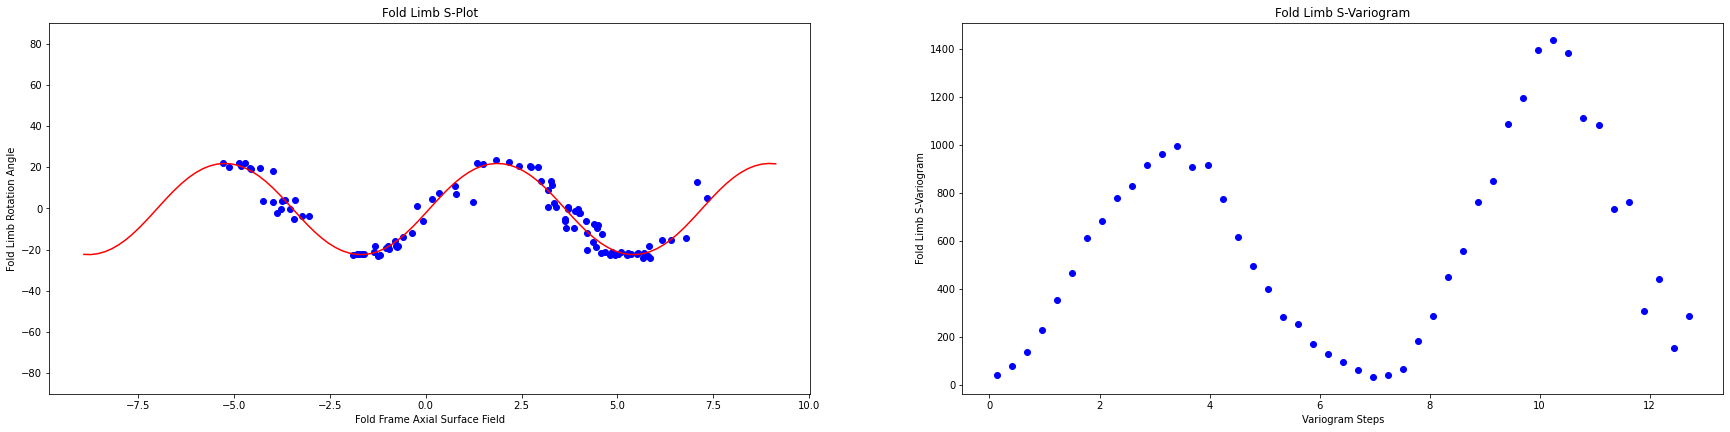

In [8]:
s1.fold.foldframe[0].set_model(model)
# s1.fold.foldframe[1].set_model(model)

s2_s1_splot = RotationAnglePlotter(s1)
s2_s1_splot.add_fold_limb_data()
s2_s1_splot.add_fold_limb_curve() 
s2_s1_splot.add_limb_svariogram()#fold_limb_
s2_s1_splot.default_titles()
s2_s1_splot.fig.delaxes(s2_s1_splot.ax[0][0])
s2_s1_splot.fig.delaxes(s2_s1_splot.ax[0][1])

roots = model['s1'].fold.fold_limb_rotation.find_hinges([model['s2'][0].min(),model['s2'][0].max()],3.5)
s2_s1_splot.ax[1][0].vlines(roots,np.zeros(len(roots))-90,np.zeros(len(roots))+90,linestyle='dashed',color='black',alpha=0.3)


# x = model['s2'][0].min()
# while x < model['s2'][0].max():
#     print(x,x+6)
#     print(flr(x),flr(x+3))
#     result = optimize.root_scalar(flr,bracket=[x,x+3])
#     roots.append(result.root)
#     s2_s1_splot.ax[1][0].axvline(result.root,linestyle='dashed',color='black',alpha=0.3)
#     x+=4
# print(roots)
# fig, ax = plt.subplots(1,2,figsize=(10,5))
# x = np.linspace(s2[0].min(),s2[0].max(),1000)
# ax[0].plot(x,s1['fold'].fold_limb_rotation(x))
# ax[0].plot(s1['fold'].fold_limb_rotation.fold_frame_coordinate,s1['fold'].fold_limb_rotation.rotation_angle,'bo')
# ax[1].plot(s1['limb_svariogram'].lags,s1['limb_svariogram'].variogram,'bo')

Modelling S0
~~~~~~~~~~~~




In [ ]:
s0 = model.create_and_add_folded_foliation('s0',
                                           fold_frame=s1,
                                            limb_wl=1., 
                                            av_fold_axis=True,
                                            nelements=5e4,
                                            buffer=0.2,
#                                             damp=True,
                                           solver='lu'
                                           )



In [ ]:
traces = data.loc[data['feature_name']=='s01',['X','Y','Z','val']].to_numpy()
unique = np.unique(traces[:,3])
vals = []
for u in unique:
    vals.append(np.mean(model['s0'].evaluate_value(model.scale(traces[traces[:,3]==u,:3],inplace=False))))
              
# vals = model['s0'].evaluate_value(model.scale(data.loc[data['feature_name']=='s01',['X','Y','Z']].to_numpy(),inplace=True))
# np.unique(vals)

In [ ]:
viewer = LavaVuModelViewer(model)
# viewer.add_scalar_field(s0,
#                        cmap='tab20')
viewer.add_isosurface(s0,
                     slices=vals,
                     paint_with=s0,
                      cmap='tab20',
                     opacity=0.7)
# viewer.add_isosurface(s1[0],nslice=3)
viewer.add_data(s0,cmap='tab20')
# viewer.add_vector_field(s1[0],locations=model.regular_grid()[::10,:])#s0.interpolator.get_gradient_constraints()[:,:3])
# # viewer.add_vector_field(s0.fold,locations=s0.interpolator.get_gradient_constraints()[:,:3])

# viewer.add_fold(s0.fold,locations=s0.interpolator.get_gradient_constraints()[:,:3])
viewer.rotate([-69.11979675292969, 15.704944610595703, 6.00014591217041])
viewer.interactive()
viewer.display()
images.append(viewer.image_array())

In [ ]:
from matplotlib import rcParams

rcParams['font.size'] = 20
fig, ax = plt.subplots(1,3,figsize=(30,10))
ax[0].imshow(images[0][60:400,100:540])
ax[1].imshow(images[1][60:400,100:540])
ax[2].imshow(images[-1][60:400,100:540])
for i in range(3):
    ax[i].axis('off')
plt.tight_layout()
ax[0].set_title('A. S2 Scalar field')
ax[1].set_title('B. S1 Scalar field')
ax[2].set_title('C. S0 geological model')

S1/S0 S-Plots 
~~~~~~~~~~~~~




In [ ]:
s0.fold.foldframe[0].set_model(model)
# s1.fold.foldframe[1].set_model(model)

s1_s0_splot = RotationAnglePlotter(s0)
s1_s0_splot.add_fold_limb_data()
s1_s0_splot.add_fold_limb_curve() 
s1_s0_splot.add_limb_svariogram()#fold_limb_
s1_s0_splot.default_titles()
s1_s0_splot.fig.delaxes(s1_s0_splot.ax[0][0])
s1_s0_splot.fig.delaxes(s1_s0_splot.ax[0][1])

roots2 = model['s0'].fold.fold_limb_rotation.find_hinges([model['s1'][0].min(),model['s1'][0].max()],.25)
s1_s0_splot.ax[1][0].vlines(roots2,np.zeros(len(roots))-90,np.zeros(len(roots))+90,linestyle='dashed',color='black',alpha=0.3)

# import scipy.optimize as optimize
# def flr(x):
#     x = np.array([x])
#     return model['s0'].fold.fold_limb_rotation(x)
# roots2 = []
# x = model['s1'][0].min()
# while x < model['s1'][0].max():
#     result = optimize.root_scalar(flr,bracket=[x,x+.3])
#     roots2.append(result.root)
#     s1_s0_splot.ax[1][0].axvline(result.root,linestyle='dashed',color='black',alpha=0.3)
#     x+=.25
# fig, ax = plt.subplots(1,2,figsize=(10,5))
# x = np.linspace(s2[0].min(),s2[0].max(),1000)
# ax[0].plot(x,s1['fold'].fold_limb_rotation(x))
# ax[0].plot(s1['fold'].fold_limb_rotation.fold_frame_coordinate,s1['fold'].fold_limb_rotation.rotation_angle,'bo')
# ax[1].plot(s1['limb_svariogram'].lags,s1['limb_svariogram'].variogram,'bo')

## Export to html
The code below creates a lavavu object that contains all of the created features. It is then exported to a html file.

In [ ]:
view = LavaVuModelViewer(model)
view.add_isosurface(model['s0'],slices=vals,paint_with=s0,cmap='tab20')
view.add_data(model['s0'])
view.add_data(model['s1'][0])
view.add_data(model['s2'][0])
view.add_isosurface(model['s1'][0],slices=roots2,paint_with=s1[0],cmap='rainbow')
view.add_isosurface(model['s2'][0],slices=roots,paint_with=s2[0],cmap='rainbow')
# view.interactive()

view.interactive()
view.export_to_webgl('fold_model')